# EDA and Scikit-learn models

## Contents

[EDA and pre-processing](#eda-and-pre-processing)
* Loaded the data and visualized the distribution of the target variable (LogD)
* Trained test split data based on scaffold and visualize target variable
* Generated descriptors and visualised chemical space 

[Trained Scikit-learn models](#)
* Four different models and evaluated performance on test set

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
from logd_pka_calculator.utils.project_setup import set_up
from logd_pka_calculator.visualization.visualize import (
    plot_distribution, 
    compare_train_test_distribution, 
    umap_visualisation,
    )
from logd_pka_calculator.data.make_dataset import load_logd_data, train_test_split
from logd_pka_calculator.features.build_features import all_descriptors
from logd_pka_calculator.models.sklearn import regression_models
from config import DATA_PATH

# Set up data folder
set_up()

# Set random seed for reproducability
np.random.seed(2023)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EDA and pre-processing

In [7]:
logd_data = load_logd_data(DATA_PATH)
logd_data.head()

Index(['Name', 'MolregNo', 'logd', 'ROMol', 'bpka', 'apka', 'SMILES',
       'Murcko_SMILES'],
      dtype='object')


,ROMol,SMILES,Murcko_SMILES,logd,apka,bpka
ID,,,,,,
O=C1O/C(=C/I)CCC1c1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x2aa445d20>,O=C1O/C(=C/I)CCC1c1cccc2ccccc12,C=C1CCC(c2cccc3ccccc23)C(=O)O1,4.05,NaN,NaN
N[C@@H](CCC(=O)Nc1ccc([N+](=O)[O-])cc1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2aa4459a0>,NC(CCC(=O)Nc1ccc([N+](=O)[O-])cc1)C(=O)O,c1ccccc1,-1.83,1.48,9.3100004
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21,<rdkit.Chem.rdchem.Mol object at 0x2aa4452a0>,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21,O=c1cc[nH]c2cc(N3CCNCC3)ccc12,-0.96,5.5799999,8.6800003
O=C1Nc2cc(Cl)ccc2C12OCCO2,<rdkit.Chem.rdchem.Mol object at 0x2aa4463b0>,O=C1Nc2cc(Cl)ccc2C12OCCO2,O=C1Nc2ccccc2C12OCCO2,2.04,10.95,NaN
COc1ccc2c(c1OC(C)=O)-c1cc(OC(C)=O)cc3c1C(C2)N(C(=O)CN(CCCl)CCCl)CC3,<rdkit.Chem.rdchem.Mol object at 0x2aa445ee0>,COc1ccc2c(c1OC(C)=O)-c1cc(OC(C)=O)cc3c1C(C2)N(...,c1ccc2c(c1)CC1NCCc3cccc-2c31,3.20,NaN,4.6999998


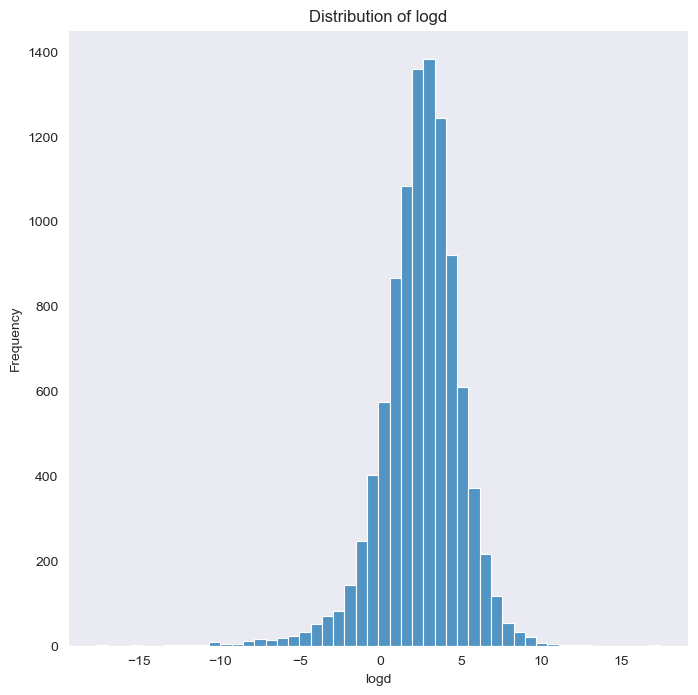

In [8]:
plot_distribution(logd_data, "logd")

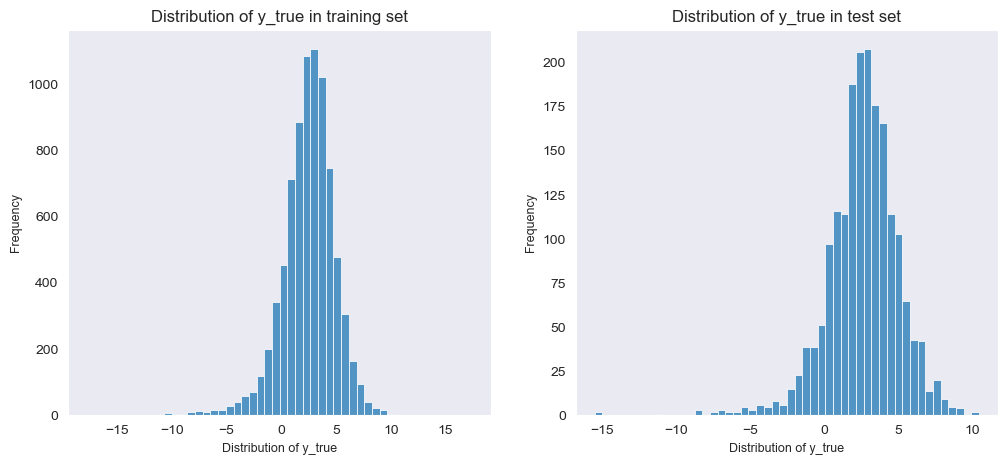

In [9]:
train, test = train_test_split(logd_data)
train.to_csv("../data/processed/train_data.csv")
test.to_csv("../data/processed/test_data.csv")
compare_train_test_distribution(train, test, "logd")

/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


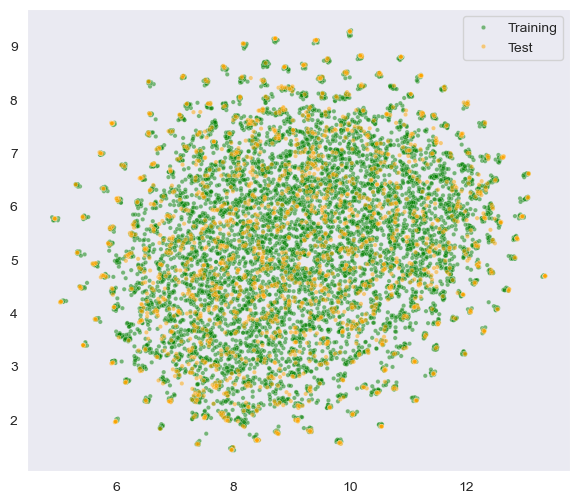

In [12]:
training_desc = all_descriptors(train)
training_desc.to_csv("../data/processed/train_desc.csv")
test_desc = all_descriptors(test)
test_desc.to_csv("../data/processed/test_desc.csv")

umap_visualisation(
    features=[training_desc, test_desc],
    classes=["Training", "Test"],
)

## Training models

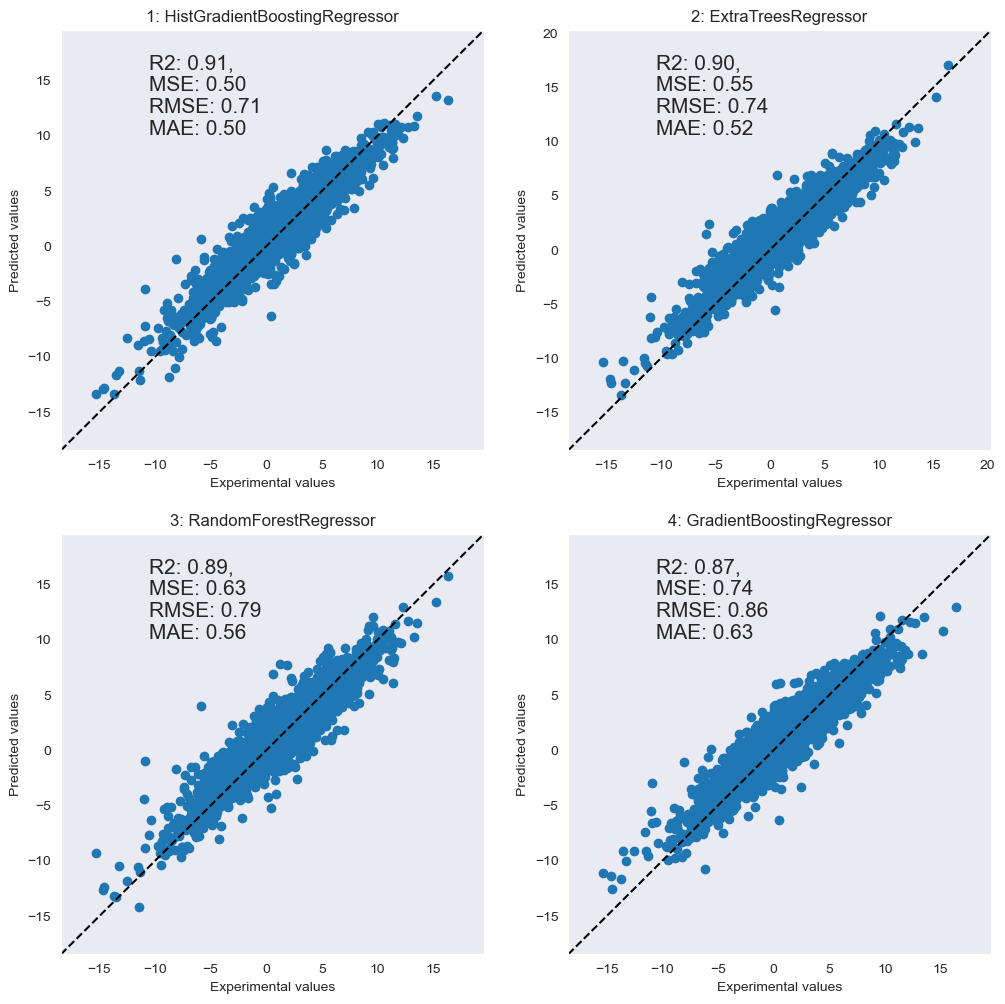

In [6]:
X_train = np.array(training_desc)
y_train = np.array(train.logd)
X_test = np.array(test_desc)
y_test = np.array(test.logd)

regression_models(X_train, y_train, X_test, y_test)